# gradient ascent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(size=100)

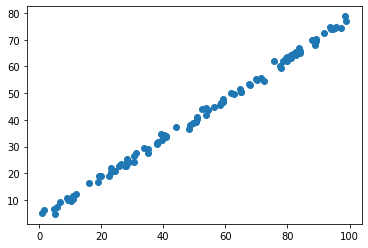

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# demean

In [4]:
def demean(X):
    # 均值归零
    # 每一列的均值（每个特征的均值）
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

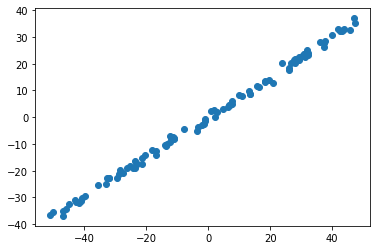

In [6]:
plt.scatter(X_demean[:,0], X_demean[:, 1])
plt.show()

In [7]:
np.mean(X_demean[:0])

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

# gradient ascent

In [9]:
def f(w, X_demean):
    return np.sum((X_demean.dot(w)) ** 2) / len(X_demean)

In [10]:
def df_math(w, X_demean):
    return X_demean.T.dot(X_demean.dot(w)) * 2 / len(X_demean)

In [34]:
def df_debug(w, X_demean, epsilon=0.0001):
    derivate = np.empty(X_demean.shape[1])
    for i in range(X_demean.shape[1]):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        derivate[i] = (f(w_1, X_demean) - f(w_2, X_demean)) / (2 * epsilon)
    return derivate
        

In [35]:
def gradient_ascent0(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):   
    w = initial_w
    i_iter = 0
    while i_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        if abs(f(w, X) - f(last_w, X)) < epsilon:
            break
        i_iter += 1
    return w

In [36]:
def direction(w):
    return w / np.linalg.norm(w)
def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    # w是一个方向向量，在推倒时假设w是单位方向向量，所以除以模
    w = direction(initial_w)
    i_iter = 0
    while i_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = direction(w + eta * gradient)   # 注意1：每次求一个单位方向
        if abs(f(w, X) - f(last_w, X)) < epsilon:
            break
        i_iter += 1
    return w

In [37]:
initial_w = np.random.normal(size=X.shape[1])  # 注意2： 不能从0开始。因为要求最大值
initial_w

array([ 0.3983884 , -1.15265895])

In [38]:
eta = 0.001

In [39]:
# 注意3：不能用standardScaler标准化数据  （因为要用方差来作为优化目标

In [40]:
w = gradient_ascent(df_debug, X_demean, initial_w, eta)

array([-0.80143701, -0.59807919])

In [43]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

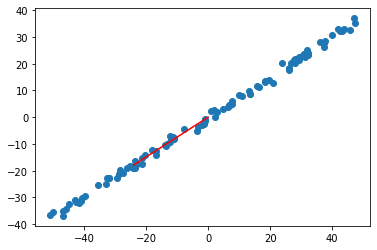

In [44]:
plt.scatter(X_demean[:,0], X_demean[:, 1])
plt.plot([0, w[0] * 30], [0, w[1] * 30], color='red')
plt.show()

In [47]:
X2 = np.empty((100, 2))
X2[:, 0] = np.random.uniform(0., 100., size=100)
X2[:, 1] = 0.75 * X2[:, 0] + 3.

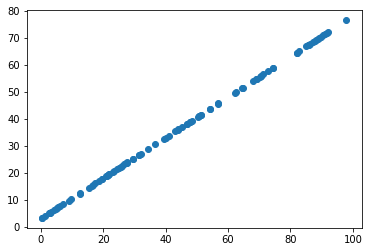

In [49]:
plt.scatter(X2[:,0], X2[:, 1])
# plt.plot([0, w[0] * 30], [0, w[1] * 30], color='red')
plt.show()

In [50]:
X2_demean = demean(X2)

In [52]:
w = gradient_ascent(df_math, X2_demean, initial_w, eta)

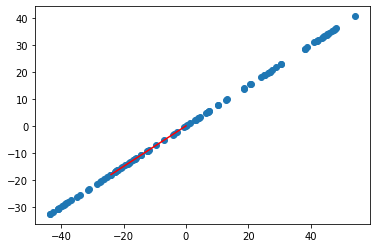

In [53]:
plt.scatter(X2_demean[:,0], X2_demean[:, 1])
plt.plot([0, w[0] * 30], [0, w[1] * 30], color='red')
plt.show()

# 求一组数据的前n个主成分

In [66]:
import numpy as np
import matplotlib.pyplot as plt

X3 = np.empty((100, 2))
X3[:, 0] = np.random.uniform(0., 100., size=100)
X3[:, 1] = 0.75 * X3[:, 0] + 3. + np.random.normal(size=100)
def demean(X):
    # 均值归零
    # 每一列的均值（每个特征的均值）
    return X - np.mean(X, axis=0)

X3_demean = demean(X3)

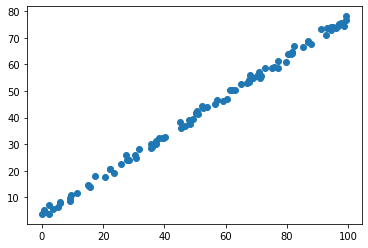

In [67]:
plt.scatter(X3[:,0], X3[:, 1])
# plt.plot([0, w[0] * 30], [0, w[1] * 30], color='red')
plt.show()

In [68]:
def f(w, X_demean):
    return np.sum((X_demean.dot(w)) ** 2) / len(X_demean)
def df(w, X_demean):
    return X_demean.T.dot(X_demean.dot(w)) * 2 / len(X_demean)
def direction(w):
    return w / np.linalg.norm(w)
def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    # w是一个方向向量，在推倒时假设w是单位方向向量，所以除以模
    w = direction(initial_w)
    i_iter = 0
    while i_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = direction(w + eta * gradient)   # 注意1：每次求一个单位方向
        if abs(f(w, X) - f(last_w, X)) < epsilon:
            break
        i_iter += 1
    return w

In [69]:
initial_w = np.random.normal(size=X3.shape[1])  # 注意2： 不能从0开始。因为要求最大值
initial_w
eta = 0.001
w = gradient_ascent(df, X3_demean, initial_w, eta)
w

array([-0.80166778, -0.59776983])

In [79]:
X4 = np.empty(X3_demean.shape)
for i in range(len(X3)):
    X4[i] = X3[i] - X3[i].dot(w) * w
X4_demean = demean(X4)

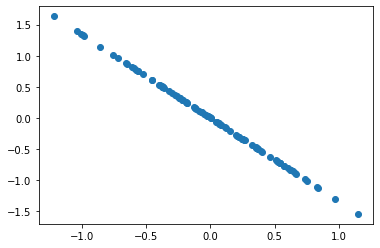

In [80]:
plt.scatter(X4_demean[:,0], X4_demean[:, 1])
# plt.plot([0, w[0] * 30], [0, w[1] * 30], color='red')
plt.show()

In [81]:
w2 = gradient_ascent(df, X4_demean, initial_w, eta)
w2

array([-0.59966902,  0.80024813])

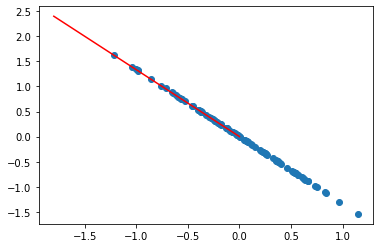

In [85]:
plt.scatter(X4_demean[:,0], X4_demean[:, 1])
plt.plot([0, w2[0] * 3], [0, w2[1] * 3], color='red')
plt.show()

In [86]:
w.dot(w2)

0.0023711430815880896